In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

In [3]:
df = pd.read_csv('2017PurchasePricesDec.csv.zip')
df1 = pd.read_csv('BegInvFINAL12312016.csv.zip')
df2 = pd.read_csv('EndInvFINAL12312016.csv.zip')
df3 = pd.read_csv('InvoicePurchases12312016.csv')
df4 = pd.read_csv('PurchasesFINAL12312016.csv.zip')
df5 = pd.read_csv('SalesFINAL12312016.csv.zip')

# Dataset 1 2017 Purchase Price

In [4]:
# 2017 Purchase Price
df = pd.read_csv("2017PurchasePricesDec.csv.zip")
df.head()

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


# Clean the dataset and handle any missing or inconsistent data

In [5]:
df.isnull().sum()

Brand             0
Description       1
Price             0
Size              1
Volume            1
Classification    0
PurchasePrice     0
VendorNumber      0
VendorName        0
dtype: int64

In [6]:
# 2017 Purchase Price.csv
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           12261 non-null  int64  
 1   Description     12260 non-null  object 
 2   Price           12261 non-null  float64
 3   Size            12260 non-null  object 
 4   Volume          12260 non-null  object 
 5   Classification  12261 non-null  int64  
 6   PurchasePrice   12261 non-null  float64
 7   VendorNumber    12261 non-null  int64  
 8   VendorName      12261 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 862.2+ KB


In [7]:
# 2017 Purchase Price.csv
df.describe()

,Brand,Price,Classification,PurchasePrice,VendorNumber
count,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000
mean,17989.067123,38.640240,1.708996,26.488220,10814.861757
std,12528.503464,206.151172,0.454244,156.182948,19007.682322
min,58.000000,0.000000,1.000000,0.000000,2.000000
25%,5990.000000,10.990000,1.000000,6.890000,3960.000000
50%,18788.000000,15.990000,2.000000,10.650000,7153.000000
75%,25117.000000,29.990000,2.000000,20.130000,9552.000000
max,90631.000000,13999.900000,2.000000,11111.030000,173357.000000


In [8]:
# 2017 Purchase Price.csv
# Drop rows with missing values
df = df.dropna()

In [9]:
df.isnull().sum()

Brand             0
Description       0
Price             0
Size              0
Volume            0
Classification    0
PurchasePrice     0
VendorNumber      0
VendorName        0
dtype: int64

In [171]:
# Save DataFrame to a CSV file
df.to_csv('cl_2017PurchasePrices.csv', index=False)

# Perform exploratory data analysis (EDA) to understand the key features and patterns.

## Total Number of Products

In [10]:
total_products = df.shape[0]
print(f"Total Number of Products: {total_products}")

Total Number of Products: 12260


## Average Price of Products

In [11]:
avg_price = df['Price'].mean()
print(f"Average Price: ${avg_price:.2f}")

Average Price: $38.64


## Total Revenue if All Units are Sold

In [12]:
total_revenue = df['Price'].sum()
print(f"Total Potential Revenue: ${total_revenue:.2f}")

Total Potential Revenue: $473767.98


## Top 5 Vendors by Total Products

In [13]:
top_vendors = df['VendorName'].value_counts().head(5)
print("Top 5 Vendors by Total Products:")
print(top_vendors)

Top 5 Vendors by Total Products:
VendorName
MARTIGNETTI COMPANIES          1631
ULTRA BEVERAGE COMPANY LLP      965
M S WALKER INC                  960
PERFECTA WINES                  897
E & J GALLO WINERY              527
Name: count, dtype: int64


## Data Visualization

### Top 10 Most Expensive Products

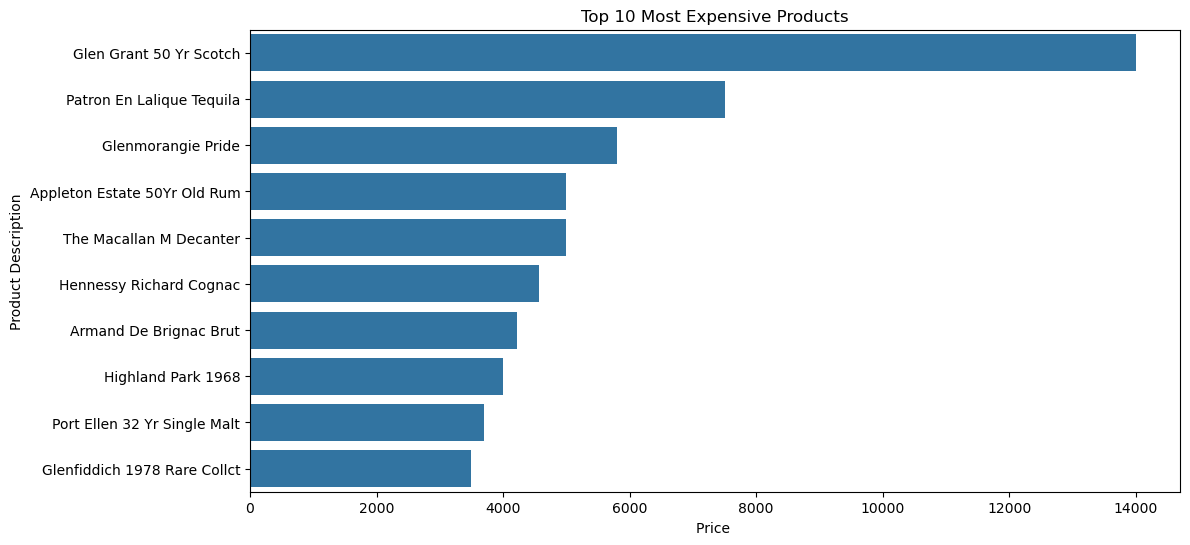

In [14]:
top_10_expensive = df[['Description', 'Price']].sort_values(by='Price', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_expensive, x='Price', y='Description')
plt.title('Top 10 Most Expensive Products')
plt.xlabel('Price ')
plt.ylabel('Product Description')
plt.show()

## Top 5 Vendors by Product Count

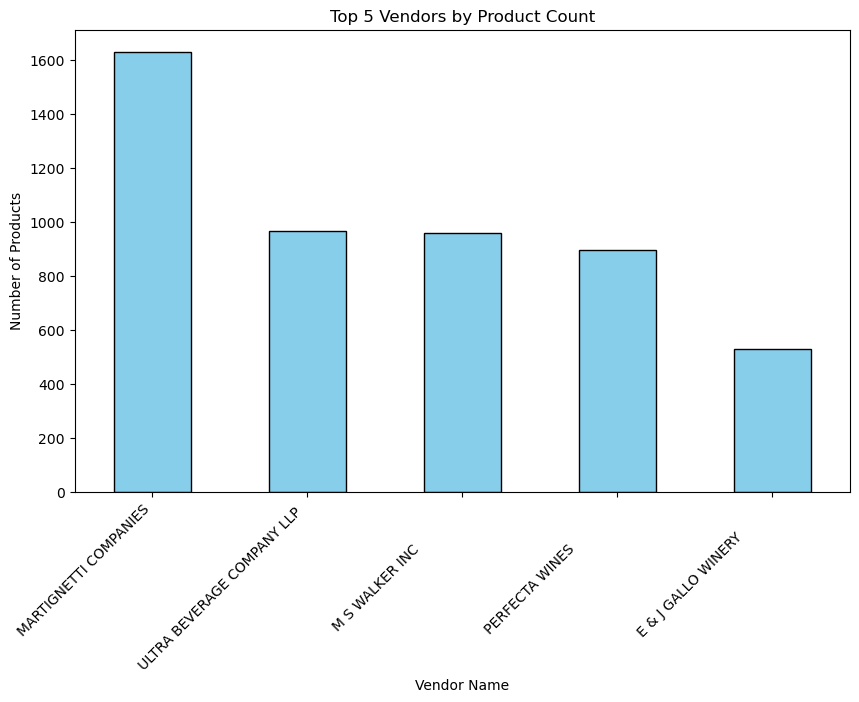

In [15]:
plt.figure(figsize=(10, 6))
top_vendors.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 5 Vendors by Product Count')
plt.xlabel('Vendor Name')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')
plt.show()

## Product Volume Distribution

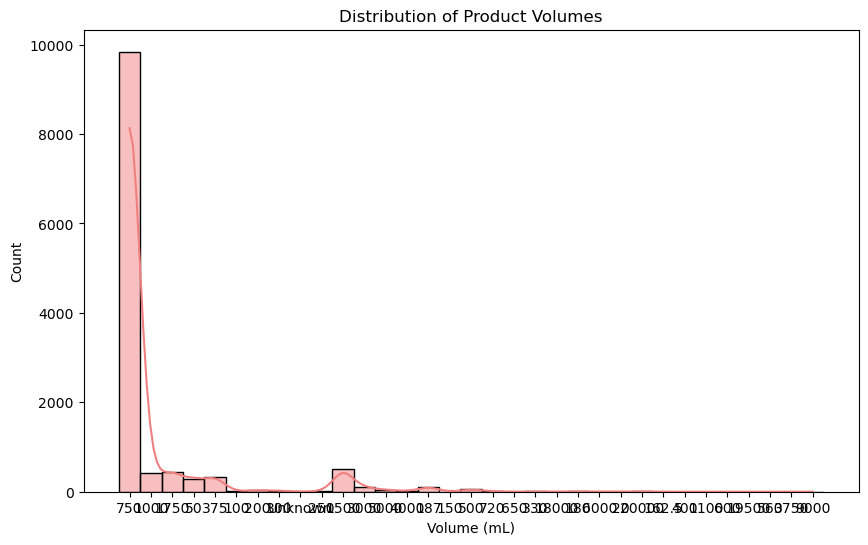

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Volume'], bins=20, kde=True, color='lightcoral')
plt.title('Distribution of Product Volumes')
plt.xlabel('Volume (mL)')
plt.ylabel('Count')
plt.show()

## Purchase Price vs. Sale Price Analysis

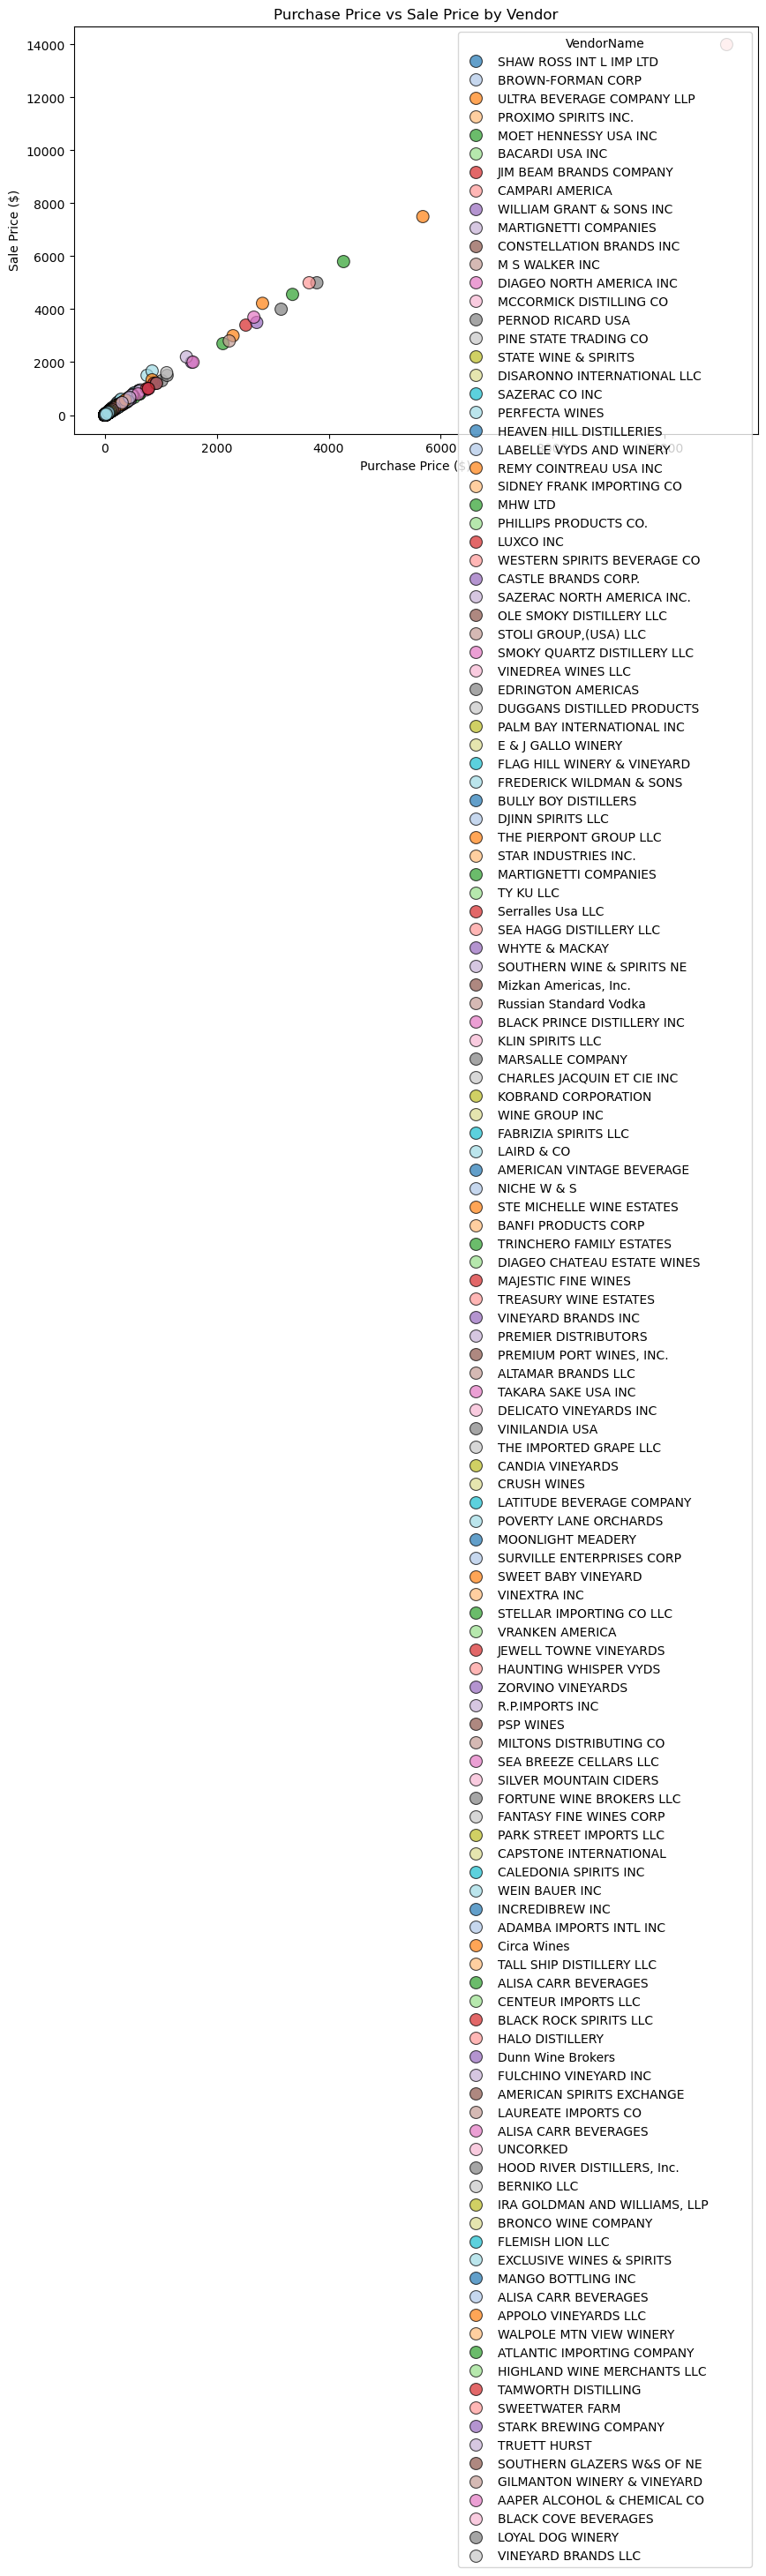

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PurchasePrice', y='Price', hue='VendorName', palette='tab20', s=100, alpha=0.7, edgecolor='black')
plt.title('Purchase Price vs Sale Price by Vendor')
plt.xlabel('Purchase Price ($)')
plt.ylabel('Sale Price ($)')
plt.show()

# Dataset 2 Beg Inv Final

In [18]:
# Beg Inv Final
df1 = pd.read_csv("BegInvFINAL12312016.csv.zip")
df1.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2016-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2016-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2016-01-01


# Clean the dataset and handle any missing or inconsistent data

In [19]:
df1.isnull().sum()

InventoryId    0
Store          0
City           0
Brand          0
Description    0
Size           0
onHand         0
Price          0
startDate      0
dtype: int64

In [20]:
# Beg Inv Final
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206529 entries, 0 to 206528
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InventoryId  206529 non-null  object 
 1   Store        206529 non-null  int64  
 2   City         206529 non-null  object 
 3   Brand        206529 non-null  int64  
 4   Description  206529 non-null  object 
 5   Size         206529 non-null  object 
 6   onHand       206529 non-null  int64  
 7   Price        206529 non-null  float64
 8   startDate    206529 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 14.2+ MB


In [21]:
# Beg Inv Final
df1.describe()

,Store,Brand,onHand,Price
count,206529.000000,206529.000000,206529.000000,206529.000000
mean,42.122457,13761.482320,20.429455,22.253910
std,23.191393,13059.429355,31.467342,70.178964
min,1.000000,58.000000,0.000000,0.000000
25%,22.000000,3746.000000,7.000000,9.990000
50%,42.000000,8010.000000,12.000000,14.990000
75%,64.000000,22143.000000,21.000000,21.990000
max,79.000000,90090.000000,1251.000000,13999.900000


In [22]:
# Convert 'startDate' to datetime format
df1['startDate'] = pd.to_datetime(df1['startDate'])

In [ ]:
# Fill missing values in 'City' column with mode
df1['City'].fillna(df1['City'].mode()[0], inplace=True)

In [26]:
# Check Missing Value after Fill mode
df1.isnull().sum()

InventoryId    0
Store          0
City           0
Brand          0
Description    0
Size           0
onHand         0
Price          0
startDate      0
dtype: int64

In [174]:
# Save DataFrame to a CSV file
df1.to_csv('cl_BegInvFINAL12312016.csv', index=False)

# Perform exploratory data analysis (EDA) to understand the key features and patterns.

## Total Stock on Hand

In [28]:
total_stock = df1['onHand'].sum()
print(f"Total Stock on Hand: {total_stock}")

Total Stock on Hand: 4219275


## Average Price of Products 

In [30]:
avg_price = df1['Price'].mean()
print(f"Average Price: {avg_price:.2f}")

Average Price: $22.25


## Total Value of Inventory

In [32]:
total_inventory_value = (df1['onHand'] * df['Price']).sum()
print(f"Total Inventory Value: {total_inventory_value:.2f}")

Total Inventory Value: 7971746.12


## Top 5 Cities by Inventory Count

In [33]:
top_cities = df1.groupby('City')['onHand'].sum().sort_values(ascending=False).head(5)
print("Top 5 Cities by Inventory Count:")
print(top_cities)

Top 5 Cities by Inventory Count:
City
EANVERNESS    365129
MOUNTMEND     346472
DONCASTER     302759
HORNSEY       206481
GOULCREST     162880
Name: onHand, dtype: int64


# Data Visualization

## Top 10 Products with the Most Stock

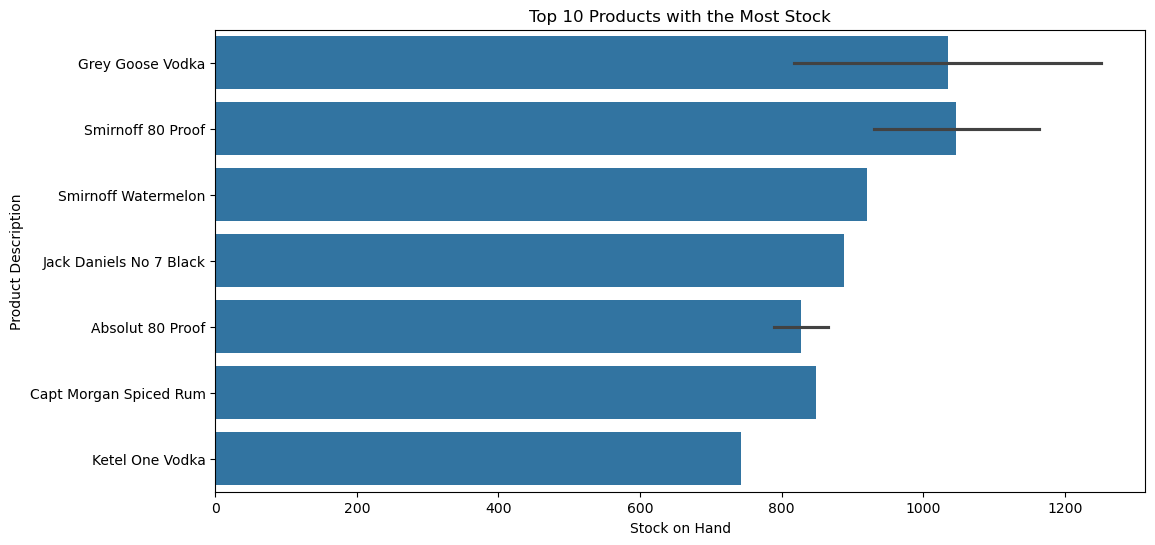

In [35]:
top_10_stock = df1[['Description', 'onHand']].sort_values(by='onHand', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_stock, x='onHand', y='Description')
plt.title('Top 10 Products with the Most Stock')
plt.xlabel('Stock on Hand')
plt.ylabel('Product Description')
plt.show()

## Inventory Value per City

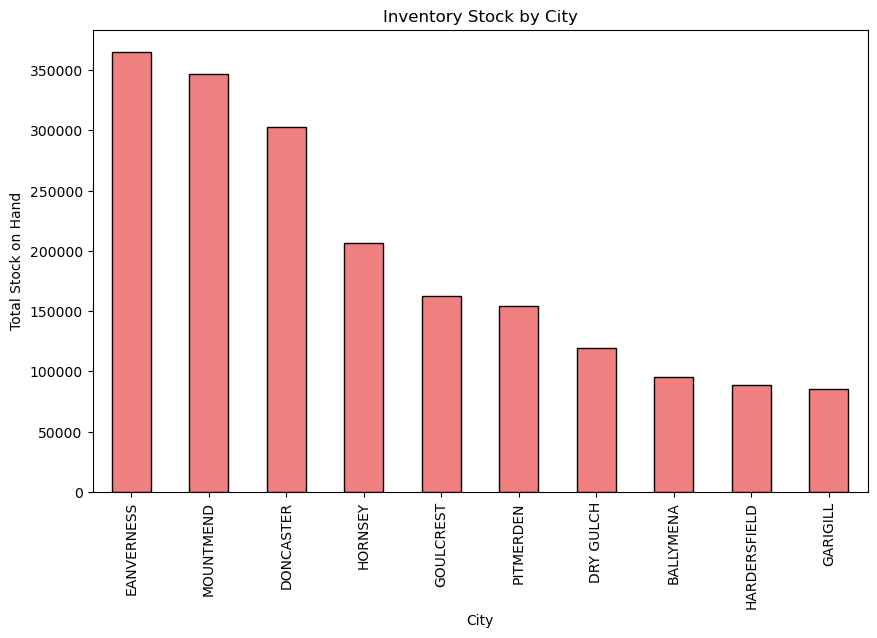

In [36]:
city_inventory_value = df1.groupby('City')['onHand'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
city_inventory_value.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Inventory Stock by City')
plt.xlabel('City')
plt.ylabel('Total Stock on Hand')
plt.show()

##  Stock vs. Price Relationship 

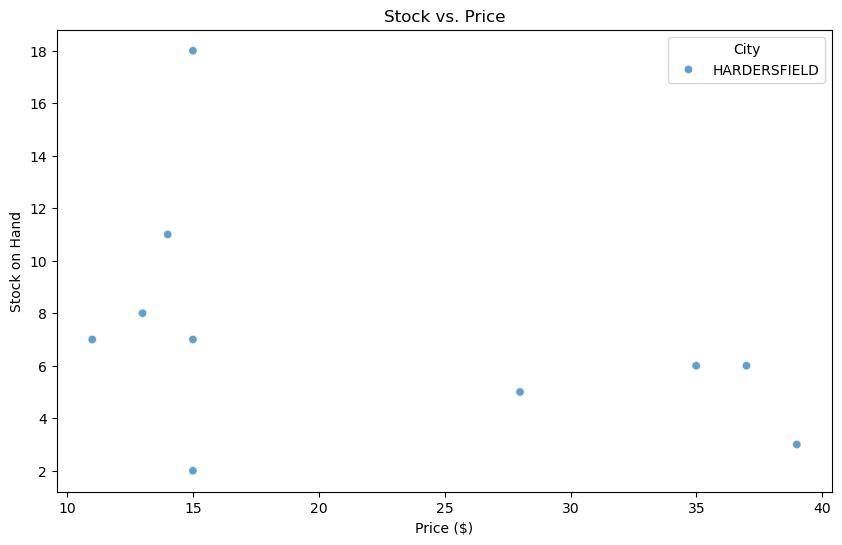

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1.head(10), x='Price', y='onHand', hue='City', alpha=0.7)
plt.title('Stock vs. Price')
plt.xlabel('Price ($)')
plt.ylabel('Stock on Hand')
plt.show()

# Dataset 3 End Inv Final

In [ ]:
# End Inv Final
df2 = pd.read_csv("EndInvFINAL12312016.csv.zip")
df2.head()

# Clean the dataset and handle any missing or inconsistent data

In [84]:
df2.isnull().sum()

InventoryId       0
Store             0
City           1284
Brand             0
Description       0
Size              0
onHand            0
Price             0
endDate           0
dtype: int64

In [40]:
# End Inv Final
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224489 entries, 0 to 224488
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InventoryId  224489 non-null  object 
 1   Store        224489 non-null  int64  
 2   City         223205 non-null  object 
 3   Brand        224489 non-null  int64  
 4   Description  224489 non-null  object 
 5   Size         224489 non-null  object 
 6   onHand       224489 non-null  int64  
 7   Price        224489 non-null  float64
 8   endDate      224489 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 15.4+ MB


In [ ]:
# End Inv Final
df2.describe()

In [44]:
# Convert 'endDate' to datetime format
df2['endDate'] = pd.to_datetime(df2['endDate'])

In [45]:
df2['endDate'].head()

0   2016-12-31
1   2016-12-31
2   2016-12-31
3   2016-12-31
4   2016-12-31
Name: endDate, dtype: datetime64[ns]

In [175]:
# Save DataFrame to a CSV file
df2.to_csv('cl_EndInvFINAL12312016.csv', index=False)

# Perform exploratory data analysis (EDA)

## Total Inventory Items

In [46]:
total_items = df2.shape[0]
print(f"Total Inventory Items: {total_items}")

Total Inventory Items: 224489


## Total Stock on Hand

In [47]:
total_stock = df2['onHand'].sum()
print(f"Total Stock on Hand: {total_stock}")

Total Stock on Hand: 4885776


## Average Price of Products

In [49]:
avg_price = df2['Price'].mean()
print(f"Average Price: {avg_price:.2f}")

Average Price: 23.59


## Highest and Lowest Stock Products

In [50]:
max_stock_product = df2.loc[df2['onHand'].idxmax(), 'Description']
min_stock_product = df2.loc[df2['onHand'].idxmin(), 'Description']

print(f"Highest Stock Product: {max_stock_product} with {df2['onHand'].max()} units")
print(f"Lowest Stock Product: {min_stock_product} with {df2['onHand'].min()} units")

Highest Stock Product: Integre Vodka with 3676 units
Lowest Stock Product: Baileys Irish Cream w/2 Mugs with 0 units


## Top 5 Brands by Stock Count

In [57]:
top_brands_stock = df2.groupby('Brand')['onHand'].sum().sort_values(ascending=False).head(5)
print("Top 5 Brands by Stock Count:")
print(top_brands_stock)

Top 5 Brands by Stock Count:
Brand
3545    16770
4261    16769
8111    16242
8068    15608
1233    15047
Name: onHand, dtype: int64


## Total Value of Inventory

In [51]:
total_inventory_value = (df2['onHand'] * df2['Price']).sum()
print(f"Total Inventory Value: ${total_inventory_value:.2f}")

Total Inventory Value: $79704851.13


## Average Stock per Product

In [52]:
avg_stock_per_product = df2['onHand'].mean()
print(f"Average Stock per Product: {avg_stock_per_product:.2f}")

Average Stock per Product: 21.76


# Data Visualizations

## Top 10 Products by Stock

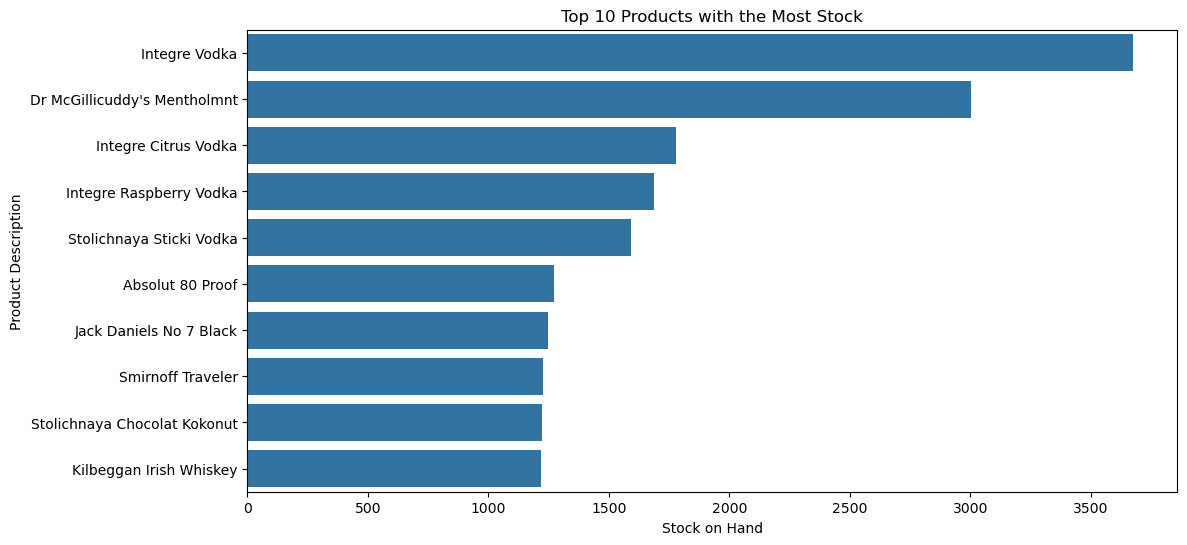

In [54]:
top_10_stock = df2[['Description', 'onHand']].sort_values(by='onHand', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_stock, y='Description', x='onHand')
plt.title('Top 10 Products with the Most Stock')
plt.xlabel('Stock on Hand')
plt.ylabel('Product Description')
plt.show()

## Top 5 Brands by Stock

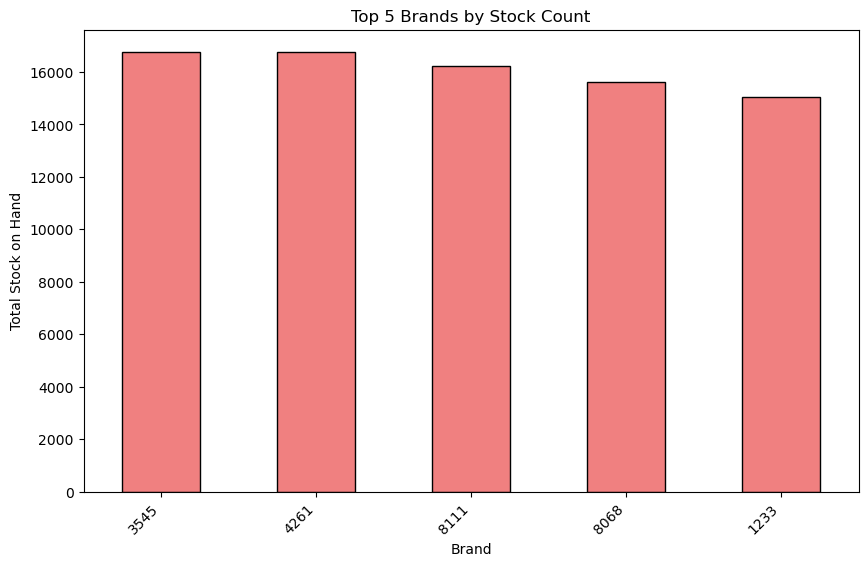

In [58]:
plt.figure(figsize=(10, 6))
top_brands_stock.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Top 5 Brands by Stock Count')
plt.xlabel('Brand')
plt.ylabel('Total Stock on Hand')
plt.xticks(rotation=45, ha='right')
plt.show()

## Stock Vs. Price Distribution

C:\Users\Admin\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


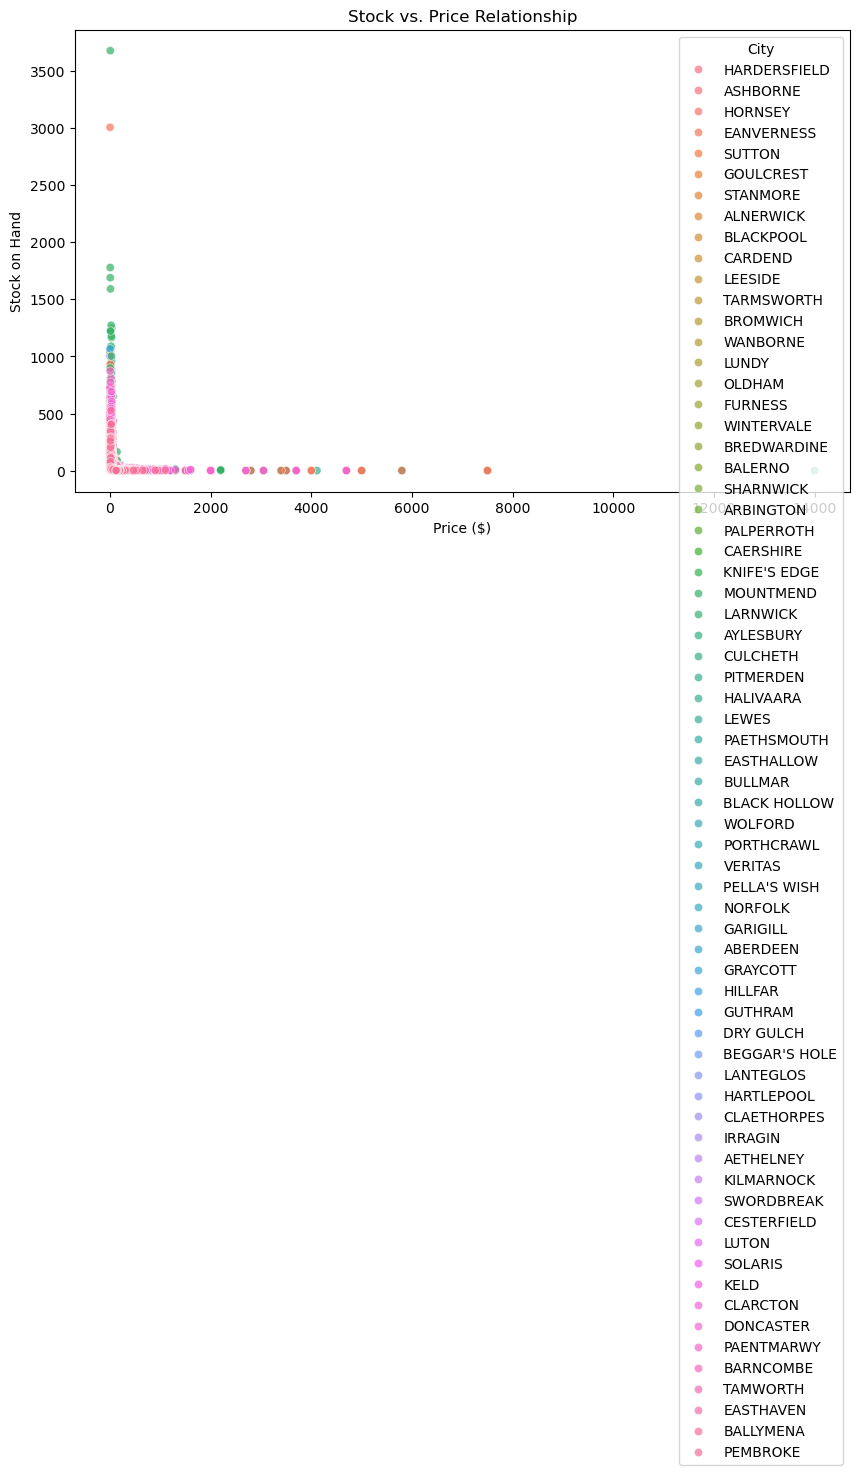

In [63]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df2, x='Price', y='onHand', hue='City', alpha=0.7)
plt.title('Stock vs. Price Relationship')
plt.xlabel('Price ($)')
plt.ylabel('Stock on Hand')
plt.show()

# Dataset 4 Invoice Purchase

In [ ]:
# Invoice Purchase
df3 = pd.read_csv("InvoicePurchases12312016.csv")
df3.head()

# Clean the dataset and handle any missing or inconsistent data

In [85]:
df3.isnull().sum()

VendorNumber       0
VendorName         0
InvoiceDate        0
PONumber           0
PODate             0
PayDate            0
Quantity           0
Dollars            0
Freight            0
Approval        5169
dtype: int64

In [64]:
# Invoice Purchase
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5543 entries, 0 to 5542
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   VendorNumber  5543 non-null   int64  
 1   VendorName    5543 non-null   object 
 2   InvoiceDate   5543 non-null   object 
 3   PONumber      5543 non-null   int64  
 4   PODate        5543 non-null   object 
 5   PayDate       5543 non-null   object 
 6   Quantity      5543 non-null   int64  
 7   Dollars       5543 non-null   float64
 8   Freight       5543 non-null   float64
 9   Approval      374 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 433.2+ KB


In [ ]:
# Invoice Purchase
df3.describe()

In [93]:
# Remove Approval Columns 
df3.drop(['Approval'], axis=1,inplace=True)

In [95]:
# Convert 'InvoiceDate' to datetime format
df3['InvoiceDate'] = pd.to_datetime(df3['InvoiceDate'])

In [96]:
df3['InvoiceDate'].head()

0   2016-01-04
1   2016-01-07
2   2016-01-09
3   2016-01-12
4   2016-01-07
Name: InvoiceDate, dtype: datetime64[ns]

In [97]:
# Convert 'PODate' to datetime format
df3['PODate'] = pd.to_datetime(df3['PODate'])

In [98]:
df3['PODate'].head()

0   2015-12-21
1   2015-12-22
2   2015-12-24
3   2015-12-20
4   2015-12-24
Name: PODate, dtype: datetime64[ns]

In [99]:
# Convert 'PayDate' to datetime format
df3['PayDate'] = pd.to_datetime(df3['PayDate'])

In [71]:
df3['PayDate'].head()

0   2016-02-16
1   2016-02-21
2   2016-02-16
3   2016-02-05
4   2016-02-12
Name: PayDate, dtype: datetime64[ns]

In [176]:
# Save DataFrame to a CSV file
df3.to_csv('cl_InvoicePurchases12312016.csv', index=False)

# Perform exploratory data analysis (EDA)

## Total Number of Purchase Orders 

In [100]:
total_pos = df3['PONumber'].nunique()
print(f"Total Number of Purchase Orders: {total_pos}")

Total Number of Purchase Orders: 5543


## Total Quantity Purchased

In [75]:
total_quantity = df3['Quantity'].sum()
print(f"Total Quantity Purchased: {total_quantity}")

Total Quantity Purchased: 33584377


## Average Order Value 

In [77]:
avg_order_value = df3['Dollars'].mean()
print(f"Average Order Value: {avg_order_value:.2f}")

Average Order Value: 58073.38


## Total Freight Charges

In [78]:
total_freight = df3['Freight'].sum()
print(f"Total Freight Charges: {total_freight:.2f}")

Total Freight Charges: 1640474.69


## Top 10 Vendors by Purchase Amount

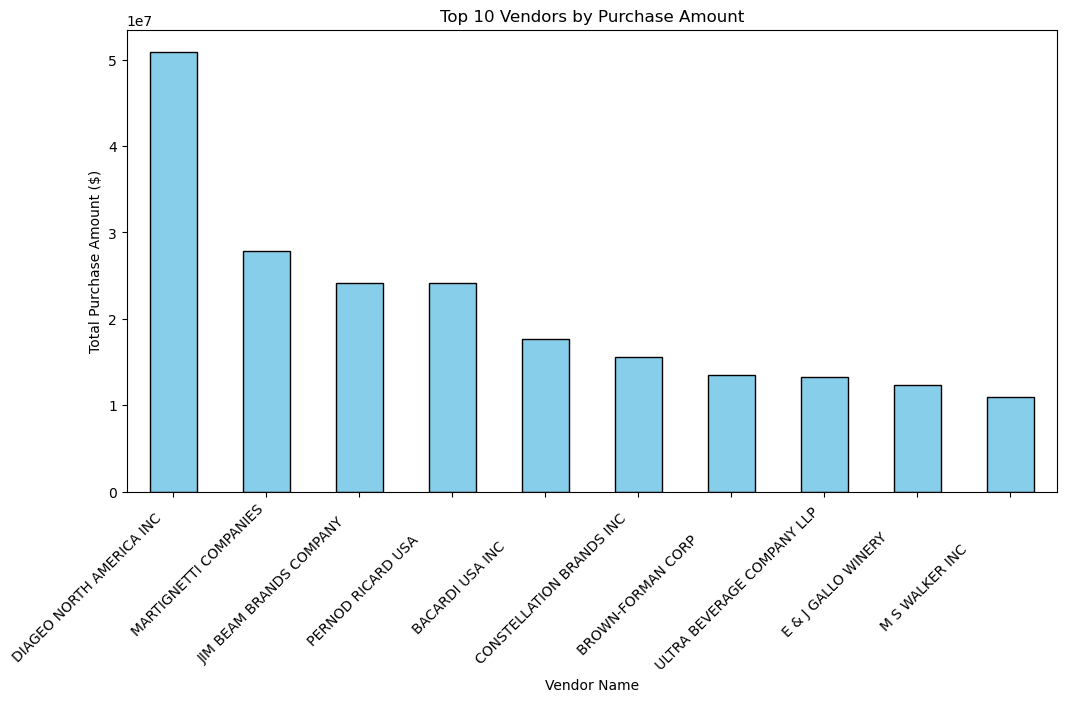

In [79]:
top_10_vendors = df3.groupby('VendorName')['Dollars'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_10_vendors.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Vendors by Purchase Amount')
plt.xlabel('Vendor Name')
plt.ylabel('Total Purchase Amount ($)')
plt.xticks(rotation=45, ha='right')
plt.show()

##  Total Freight Charges by Vendor

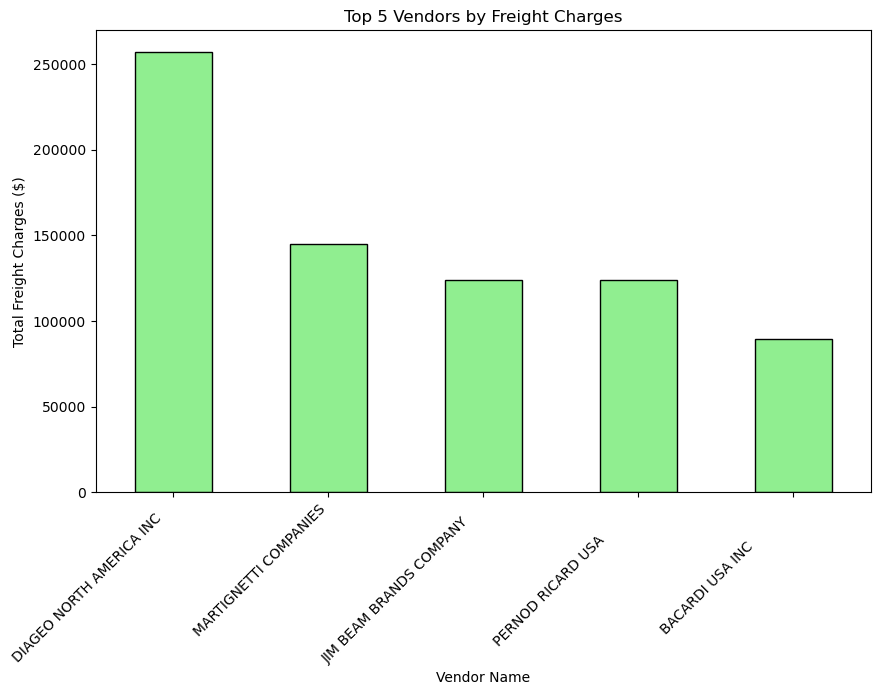

In [80]:
top_5_vendors_freight = df3.groupby('VendorName')['Freight'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
top_5_vendors_freight.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Top 5 Vendors by Freight Charges')
plt.xlabel('Vendor Name')
plt.ylabel('Total Freight Charges ($)')
plt.xticks(rotation=45, ha='right')
plt.show()

## Purchase Amount Trend Over Time

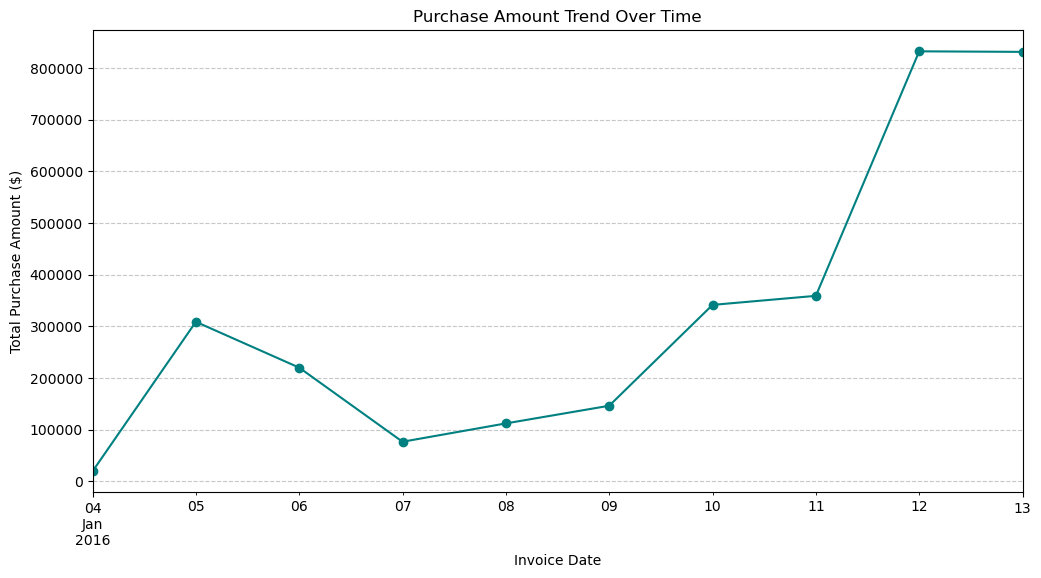

In [82]:
# Group by InvoiceDate and sum Dollars to get daily trend
purchase_trend = df3.groupby('InvoiceDate')['Dollars'].sum().head(10)

plt.figure(figsize=(12, 6))
purchase_trend.plot(kind='line', marker='o', color='teal')
plt.title('Purchase Amount Trend Over Time')
plt.xlabel('Invoice Date')
plt.ylabel('Total Purchase Amount ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Dataset 5 Purchase Final

In [107]:
# Purchare Final
df4 = pd.read_csv("PurchasesFINAL12312016.csv.zip")
df4.head()

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,1


In [147]:
# Purchare Final
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2372471 entries, 0 to 2372473
Data columns (total 16 columns):
 #   Column          Dtype  
---  ------          -----  
 0   InventoryId     object 
 1   Store           int64  
 2   Brand           int64  
 3   Description     object 
 4   Size            object 
 5   VendorNumber    int64  
 6   VendorName      object 
 7   PONumber        int64  
 8   PODate          object 
 9   ReceivingDate   object 
 10  InvoiceDate     object 
 11  PayDate         object 
 12  PurchasePrice   float64
 13  Quantity        int64  
 14  Dollars         float64
 15  Classification  int64  
dtypes: float64(2), int64(6), object(8)
memory usage: 307.7+ MB


In [103]:
# Purchare Final
df4.describe()

,Store,Brand,VendorNumber,PONumber,PurchasePrice,Quantity,Dollars,Classification
count,2.372474e+06,2.372474e+06,2.372474e+06,2.372474e+06,2.372474e+06,2.372474e+06,2.372474e+06,2.372474e+06
mean,4.465133e+01,1.241864e+04,6.886436e+03,1.104094e+04,1.205005e+01,1.415585e+01,1.356815e+02,1.443520e+00
std,2.351245e+01,1.255728e+04,8.066694e+03,1.565340e+03,1.794510e+01,2.344616e+01,2.816649e+02,4.967999e-01
min,1.000000e+00,5.800000e+01,2.000000e+00,8.106000e+03,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,2.500000e+01,3.639000e+03,3.252000e+03,9.761000e+03,6.120000e+00,6.000000e+00,4.926000e+01,1.000000e+00
50%,4.800000e+01,6.523000e+03,4.425000e+03,1.110300e+04,9.220000e+00,1.000000e+01,8.393000e+01,1.000000e+00
75%,6.700000e+01,1.887700e+04,9.552000e+03,1.239700e+04,1.449000e+01,1.200000e+01,1.405200e+02,2.000000e+00
max,8.100000e+01,9.063100e+04,2.013590e+05,1.366100e+04,5.681810e+03,3.816000e+03,5.017570e+04,2.000000e+00


In [150]:
# convert 'PODate' to datetime Format
df4['PODate'] = pd.to_datetime(df4['PODate'])
df4['PODate'].head()

0   2015-12-21
1   2015-12-22
2   2015-12-22
3   2015-12-22
4   2015-12-24
Name: PODate, dtype: datetime64[ns]

In [151]:
# convert 'ReceivingDate' to datetime Format
df4['ReceivingDate'] = pd.to_datetime(df4['ReceivingDate'])
df4['ReceivingDate'].head()

0   2016-01-02
1   2016-01-01
2   2016-01-02
3   2016-01-01
4   2016-01-02
Name: ReceivingDate, dtype: datetime64[ns]

In [153]:
# convert 'InvoiceDate' to datetime Format
df4['InvoiceDate'] = pd.to_datetime(df4['InvoiceDate'])
df4['InvoiceDate'].head()

0   2016-01-04
1   2016-01-07
2   2016-01-07
3   2016-01-07
4   2016-01-09
Name: InvoiceDate, dtype: datetime64[ns]

In [152]:
# convert 'PayDate' to datetime Format
df4['PayDate'] = pd.to_datetime(df4['PayDate'])
df4['PayDate'].head()

0   2016-02-16
1   2016-02-21
2   2016-02-21
3   2016-02-21
4   2016-02-16
Name: PayDate, dtype: datetime64[ns]

# Clean the dataset and handle any missing or inconsistent data

In [108]:
df4.isnull().sum()

InventoryId       0
Store             0
Brand             0
Description       0
Size              3
VendorNumber      0
VendorName        0
PONumber          0
PODate            0
ReceivingDate     0
InvoiceDate       0
PayDate           0
PurchasePrice     0
Quantity          0
Dollars           0
Classification    0
dtype: int64

In [109]:
# # Drop rows with any missing (NaN) values
df4.dropna(inplace=True)

In [110]:
df4.isnull().sum()

InventoryId       0
Store             0
Brand             0
Description       0
Size              0
VendorNumber      0
VendorName        0
PONumber          0
PODate            0
ReceivingDate     0
InvoiceDate       0
PayDate           0
PurchasePrice     0
Quantity          0
Dollars           0
Classification    0
dtype: int64

In [170]:
# Save DataFrame to a CSV file
df4.to_csv('cl_PurchasesFINAL12312016.csv', index=False)

# Perform exploratory data analysis(EDA)

## Total Number of Purchase Orders

In [111]:
total_pos = df4['PONumber'].nunique()
print(f"Total Number of Purchase Orders: {total_pos}")

Total Number of Purchase Orders: 5543


##  Total Quantity Purchased

In [112]:
total_quantity = df4['Quantity'].sum()
print(f"Total Quantity Purchased: {total_quantity}")

Total Quantity Purchased: 33584363


##  Total Purchase Amount (Dollars)

In [114]:
total_dollars = df4['Dollars'].sum()
print(f"Total Purchase Amount: {total_dollars:.2f}")

Total Purchase Amount: 321900583.61


## Average Purchase per Unit

In [115]:
avg_purchase_price = df4['PurchasePrice'].mean()
print(f"Average Purchase Price per Unit: {avg_purchase_price:.2f}")

Average Purchase Price per Unit: 12.05


## Average Order Value

In [116]:
avg_order_value = df4.groupby('PONumber')['Dollars'].sum().mean()
print(f"Average Order Value (AOV): {avg_order_value:.2f}")

Average Order Value (AOV): 58073.35


## Top 5 Vendor By Purchase  Amount 

In [117]:
top_vendors_dollars = df4.groupby('VendorName')['Dollars'].sum().sort_values(ascending=False).head(5)
print("Top 5 Vendors by Purchase Amount:")
print(top_vendors_dollars)

Top 5 Vendors by Purchase Amount:
VendorName
DIAGEO NORTH AMERICA INC       50959796.85
MARTIGNETTI COMPANIES          27821473.91
JIM BEAM BRANDS COMPANY        24203060.96
PERNOD RICARD USA              24124091.56
BACARDI USA INC                17624378.72
Name: Dollars, dtype: float64


## Total Inventory Value

In [118]:
total_inventory_value = (df4['Quantity'] * df4['PurchasePrice']).sum()
print(f"Total Inventory Value: {total_inventory_value:.2f}")

Total Inventory Value: 321900583.61


# Data Visualizations

## Top 10 Products by Purchase Amount

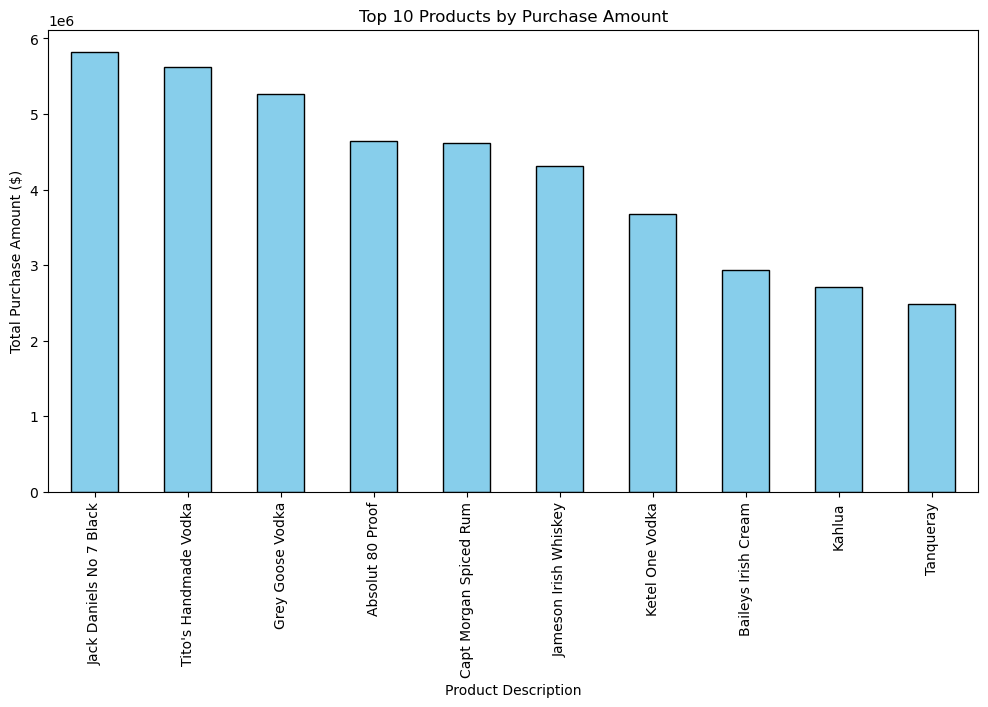

In [119]:
top_10_products = df4.groupby('Description')['Dollars'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_10_products.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Products by Purchase Amount')
plt.xlabel('Product Description')
plt.ylabel('Total Purchase Amount ($)')
plt.show()

## Top 5 Vendors by Purchase Amount 

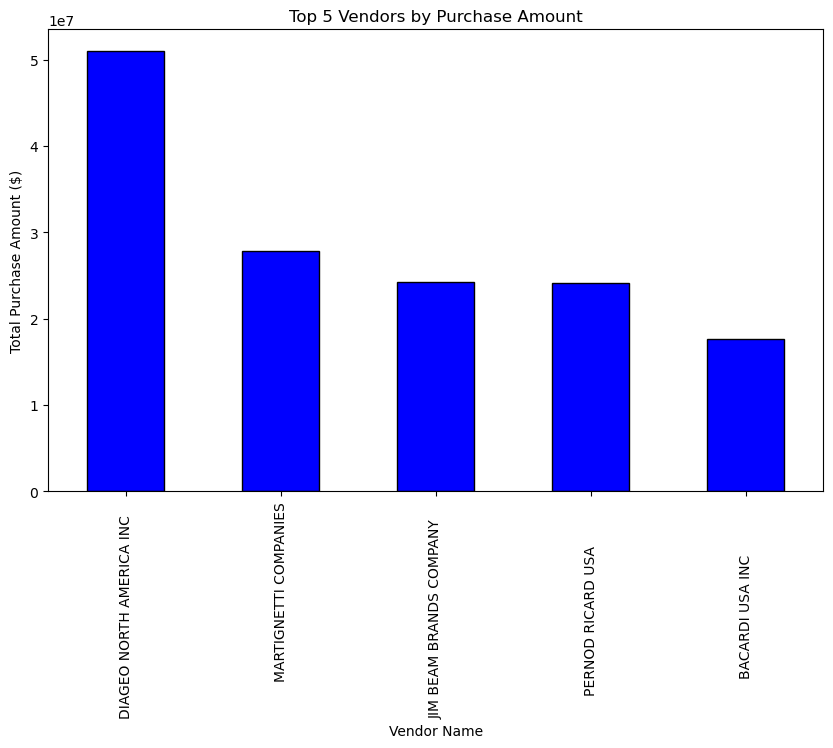

In [121]:
plt.figure(figsize=(10, 6))
top_vendors_dollars.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Top 5 Vendors by Purchase Amount')
plt.xlabel('Vendor Name')
plt.ylabel('Total Purchase Amount ($)')
plt.show()

## Purchase Amount Vs. Quantity(Scatter plot)

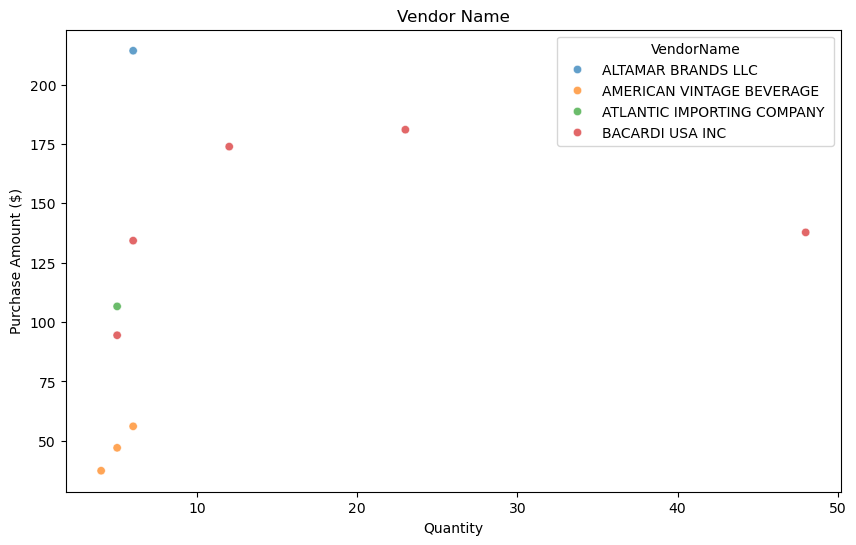

In [129]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df4.head(10), x='Quantity', y='Dollars', hue='VendorName', alpha=0.7)
plt.title('Purchase Amount vs. Quantity')
plt.xlabel('Quantity')
plt.ylabel('Purchase Amount ($)')
plt.title('Vendor Name')
plt.show()

In [ ]:
## Total Purchase amount Trend over time

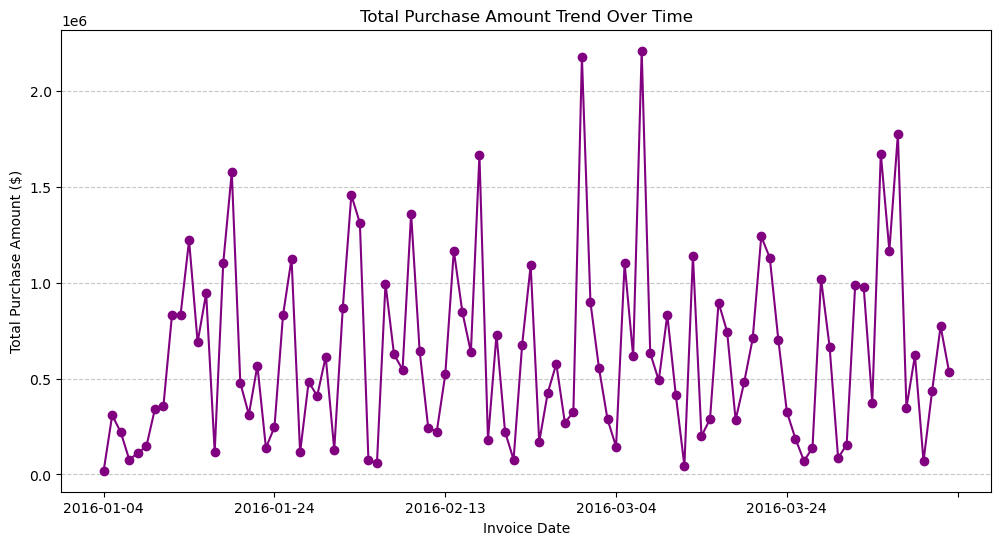

In [134]:
# Group by InvoiceDate and calculate total purchase amount
purchase_trend = df4.groupby('InvoiceDate')['Dollars'].sum().head(100)

plt.figure(figsize=(12, 6))
purchase_trend.plot(kind='line', marker='o', color='purple')
plt.title('Total Purchase Amount Trend Over Time')
plt.xlabel('Invoice Date')
plt.ylabel('Total Purchase Amount ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Inventory Value by Classification

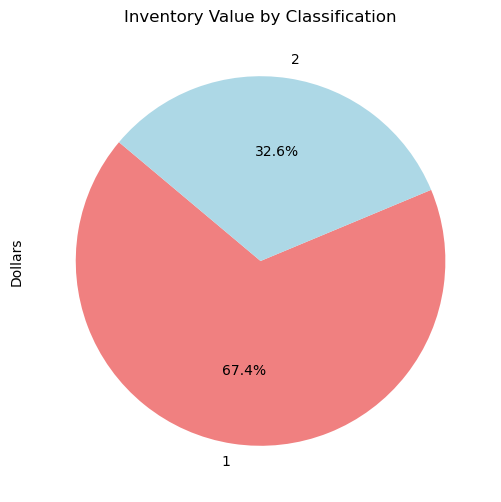

In [136]:
inventory_value_by_class = df4.groupby('Classification')['Dollars'].sum()

plt.figure(figsize=(10, 6))
inventory_value_by_class.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightblue', 'lightgreen'])
plt.title('Inventory Value by Classification')
plt.ylabel('Dollars')
plt.show()

## Dataset 6 Sales Final

In [139]:
# sales Final
df5 = pd.read_csv("SalesFINAL12312016.csv.zip")
df5.head()

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/1/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,1/2/2016,750,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/3/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,1/8/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,1/9/2016,375,1,0.79,12546,JIM BEAM BRANDS COMPANY


# Clean the dataset and handle any missing or inconsistent data

In [137]:
df5.isnull().sum()

InventoryId       0
Store             0
Brand             0
Description       0
Size              0
SalesQuantity     0
SalesDollars      0
SalesPrice        0
SalesDate         0
Volume            0
Classification    0
ExciseTax         0
VendorNo          0
VendorName        0
dtype: int64

In [140]:
# sales Final
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 14 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   InventoryId     1048575 non-null  object 
 1   Store           1048575 non-null  int64  
 2   Brand           1048575 non-null  int64  
 3   Description     1048575 non-null  object 
 4   Size            1048575 non-null  object 
 5   SalesQuantity   1048575 non-null  int64  
 6   SalesDollars    1048575 non-null  float64
 7   SalesPrice      1048575 non-null  float64
 8   SalesDate       1048575 non-null  object 
 9   Volume          1048575 non-null  int64  
 10  Classification  1048575 non-null  int64  
 11  ExciseTax       1048575 non-null  float64
 12  VendorNo        1048575 non-null  int64  
 13  VendorName      1048575 non-null  object 
dtypes: float64(3), int64(6), object(5)
memory usage: 112.0+ MB


In [138]:
# sales Final
df5.describe()

,Store,Brand,SalesQuantity,SalesDollars,SalesPrice,Volume,Classification,ExciseTax,VendorNo
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,4.008063e+01,1.216959e+04,2.337619e+00,3.160420e+01,1.543162e+01,9.500280e+02,1.416550e+00,1.326847e+00,6.995043e+03
std,2.435739e+01,1.241921e+04,3.511492e+00,6.570249e+01,1.404967e+01,7.142708e+02,4.929872e-01,3.407898e+00,8.426736e+03
min,1.000000e+00,5.800000e+01,1.000000e+00,4.900000e-01,4.900000e-01,5.000000e+01,1.000000e+00,1.000000e-02,2.000000e+00
25%,1.500000e+01,3.680000e+03,1.000000e+00,1.099000e+01,8.990000e+00,7.500000e+02,1.000000e+00,1.600000e-01,3.252000e+03
50%,3.900000e+01,6.296000e+03,1.000000e+00,1.799000e+01,1.299000e+01,7.500000e+02,1.000000e+00,6.800000e-01,4.425000e+03
75%,6.400000e+01,1.795400e+04,2.000000e+00,3.199000e+01,1.899000e+01,1.500000e+03,2.000000e+00,1.570000e+00,9.552000e+03
max,7.900000e+01,9.008900e+04,4.320000e+02,1.327997e+04,4.999990e+03,2.000000e+04,2.000000e+00,3.785200e+02,1.733570e+05


In [145]:
df5['SalesDate'] = pd.to_datetime(df5['SalesDate'])

In [146]:
df5['SalesDate'].head()

0   2016-01-01
1   2016-01-02
2   2016-01-03
3   2016-01-08
4   2016-01-09
Name: SalesDate, dtype: datetime64[ns]

In [167]:
# Save DataFrame to a CSV file
df5.to_csv('Cl_SalesFINAL12312016.csv', index=False)

# Perform exploratory data analysis (EDA)

## Total Sales Quantity

In [154]:
total_sales_quantity = df5['SalesQuantity'].sum()
print(f"Total Sales Quantity: {total_sales_quantity}")

Total Sales Quantity: 2451169


## Total Sales Revenue

In [155]:
total_sales_dollars = df5['SalesDollars'].sum()
print(f"Total Sales Revenue: {total_sales_dollars:.2f}")

Total Sales Revenue: 33139375.29


## Average Sales Price per Unit

In [156]:
avg_sales_price = df5['SalesPrice'].mean()
print(f"Average Sales Price per Unit: {avg_sales_price:.2f}")

Average Sales Price per Unit: $15.43


## Top 5 Best-Selling Products by Quantity

In [157]:
top_5_products_quantity = df5.groupby('Description')['SalesQuantity'].sum().sort_values(ascending=False).head(5)
print("Top 5 Best-Selling Products by Quantity:")
print(top_5_products_quantity)

Top 5 Best-Selling Products by Quantity:
Description
Smirnoff 80 Proof               43423
Capt Morgan Spiced Rum          35866
Dr McGillicuddy's Mentholmnt    24188
Yukon Jack                      24037
Jack Daniels No 7 Black         23797
Name: SalesQuantity, dtype: int64


## Top 5 Best-Selling Products by Revenue

In [158]:
top_5_products_dollars = df5.groupby('Description')['SalesDollars'].sum().sort_values(ascending=False).head(5)
print("Top 5 Best-Selling Products by Revenue:")
print(top_5_products_dollars)

Top 5 Best-Selling Products by Revenue:
Description
Capt Morgan Spiced Rum     610008.34
Jack Daniels No 7 Black    558064.03
Absolut 80 Proof           422095.29
Tito's Handmade Vodka      420186.25
Ketel One Vodka            417950.59
Name: SalesDollars, dtype: float64


## Total Excise Tax Collected

In [159]:
total_excise_tax = df5['ExciseTax'].sum()
print(f"Total Excise Tax Collected: {total_excise_tax:.2f}")

Total Excise Tax Collected: 1391298.65


## Average Sales Transaction

In [160]:
avg_sales_transaction = df5['SalesDollars'].mean()
print(f"Average Sales per Transaction: {avg_sales_transaction:.2f}")

Average Sales per Transaction: 31.60


# Data Visualization

## 'Top 5 Best-Selling Products by Revenue

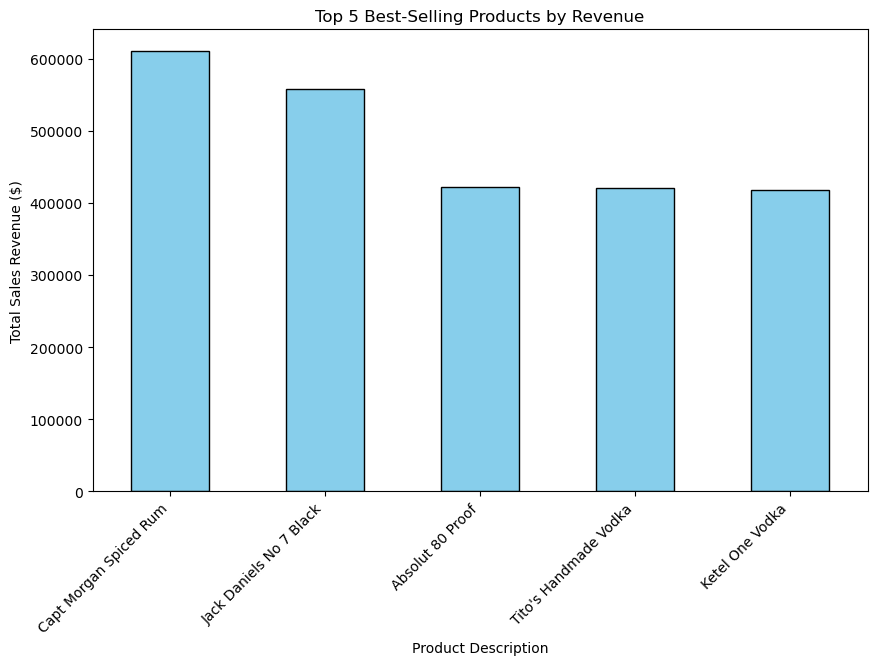

In [162]:
plt.figure(figsize=(10, 6))
top_5_products_dollars.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 5 Best-Selling Products by Revenue')
plt.xlabel('Product Description')
plt.ylabel('Total Sales Revenue ($)')
plt.xticks(rotation=45, ha='right')
plt.show()

## Daily Sales Trend

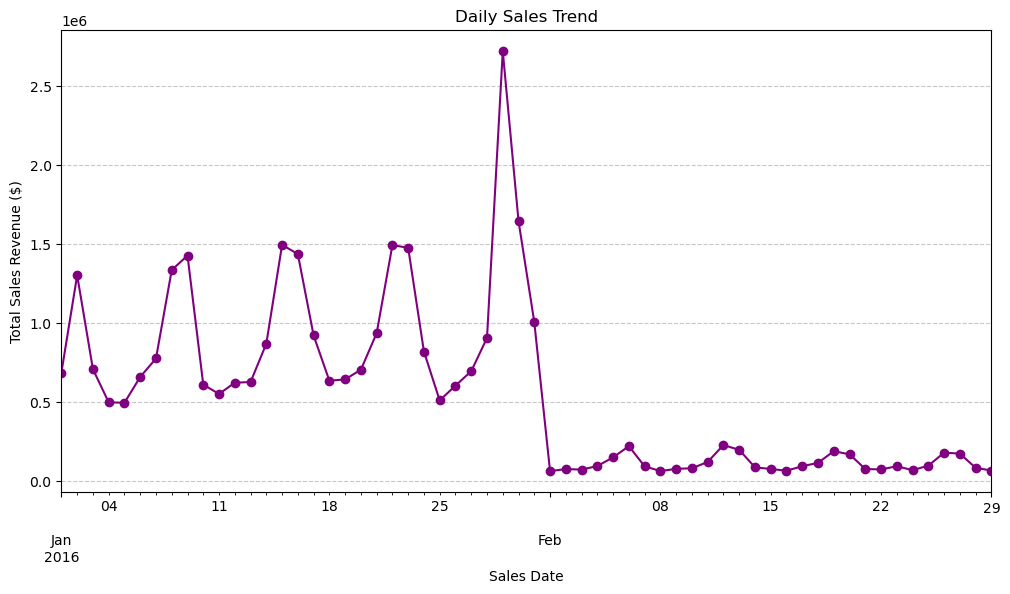

In [163]:
# Group by SalesDate to get total sales per day
daily_sales_trend = df5.groupby('SalesDate')['SalesDollars'].sum()

# Plot daily sales trend
plt.figure(figsize=(12, 6))
daily_sales_trend.plot(kind='line', marker='o', color='purple')
plt.title('Daily Sales Trend')
plt.xlabel('Sales Date')
plt.ylabel('Total Sales Revenue ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Excise Tax Contribution by Vendor

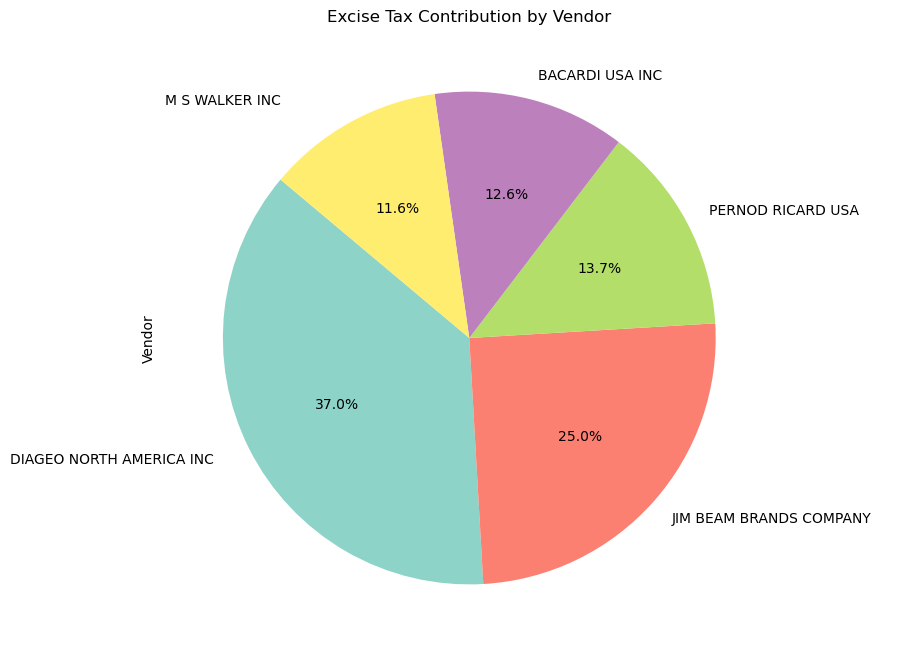

In [165]:
excise_tax_by_vendor = df5.groupby('VendorName')['ExciseTax'].sum().sort_values(ascending=False).head(5)

# Plot pie chart
plt.figure(figsize=(8, 8))
excise_tax_by_vendor.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='Set3')
plt.title('Excise Tax Contribution by Vendor')
plt.ylabel('Vendor')
plt.show()